In [1]:
import os, sys

In [2]:
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torchvision import  datasets
from torchvision.transforms import Compose, ToTensor, ConvertImageDtype
from torchvision.utils import  make_grid
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

d:\My_toolkits\Python\Python 3.9.6\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sys.path.append('../../')
from models import GanGenerator, GanDiscriminator, GanTrainer

In [4]:
import importlib
importlib.reload(sys.modules['models'])

<module 'models' from 'd:\\Entertainment\\HCMUT\\IAS_lab\\research\\gans-collection\\notebooks\\gan\\../..\\models\\__init__.py'>

In [7]:
BATCH_SIZE = 32
Z_DIM = 100
IM_SHAPE = (1,28,28)
CRITIC_ITERATION = 5

In [5]:
custom_transforms = Compose([
    ToTensor(),
    ConvertImageDtype(torch.float32)
])

dataset = datasets.MNIST(
    root='../../data', download=True,
    transform=custom_transforms)
loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [8]:
generator = GanGenerator(Z_DIM, IM_SHAPE).to(device)
discriminator =  GanDiscriminator(IM_SHAPE).to(device)
GanTrainer(50, generator, discriminator, loader, CRITIC_ITERATION, device)

Epoch 1/50
1875/1875 - lossD: 0.0073 - lossG: 5.2118 - 41s/epoch
Epoch 2/50
1875/1875 - lossD: 0.0351 - lossG: 4.3613 - 50s/epoch
Epoch 3/50
1875/1875 - lossD: 0.0260 - lossG: 6.1853 - 49s/epoch
Epoch 4/50
1875/1875 - lossD: 0.0128 - lossG: 6.0133 - 47s/epoch
Epoch 5/50
1875/1875 - lossD: 0.0652 - lossG: 6.8297 - 52s/epoch
Epoch 6/50
1875/1875 - lossD: 0.0269 - lossG: 6.2281 - 52s/epoch
Epoch 7/50
1875/1875 - lossD: 0.0477 - lossG: 6.6848 - 53s/epoch
Epoch 8/50
1875/1875 - lossD: 0.0479 - lossG: 4.9434 - 44s/epoch
Epoch 9/50
1875/1875 - lossD: 0.0557 - lossG: 3.9817 - 46s/epoch
Epoch 10/50
1875/1875 - lossD: 0.0561 - lossG: 3.8425 - 51s/epoch
Epoch 11/50
1875/1875 - lossD: 0.0995 - lossG: 4.1334 - 45s/epoch
Epoch 12/50
1875/1875 - lossD: 0.0357 - lossG: 5.1747 - 54s/epoch
Epoch 13/50
1875/1875 - lossD: 0.1769 - lossG: 3.0465 - 42s/epoch
Epoch 14/50
1875/1875 - lossD: 0.1176 - lossG: 3.8894 - 49s/epoch
Epoch 15/50
1875/1875 - lossD: 0.1905 - lossG: 3.3575 - 47s/epoch
Epoch 16/50
1875/18

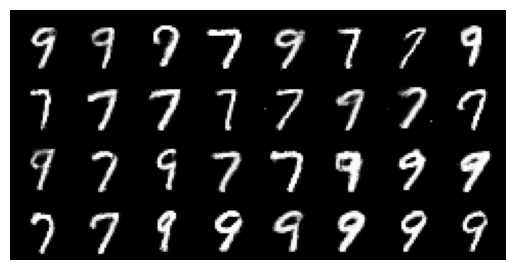

In [23]:
noise = torch.randn([BATCH_SIZE, Z_DIM]).to(device)
img = make_grid(generator(noise)).detach().cpu().numpy().transpose([1,2,0])
plt.imshow(img,vmin=0, vmax=1, cmap='gray')
plt.axis('off')
plt.show()